In [1053]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

train=pd.read_csv('train.csv')
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [1054]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [1055]:

train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1056]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1057]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


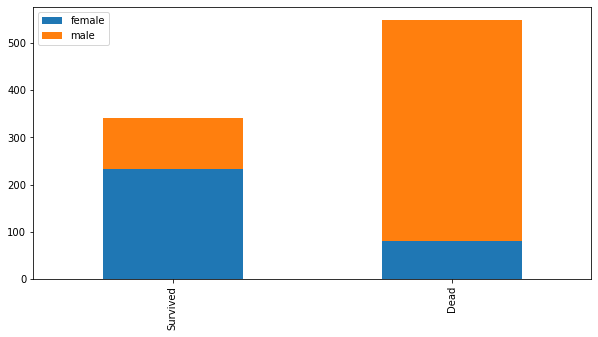

In [1058]:
bar_chart('Sex')

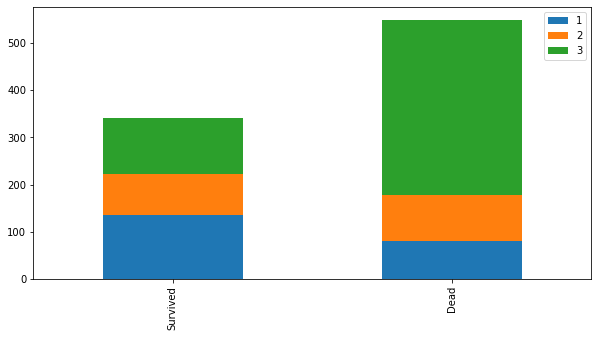

In [1059]:
bar_chart('Pclass')

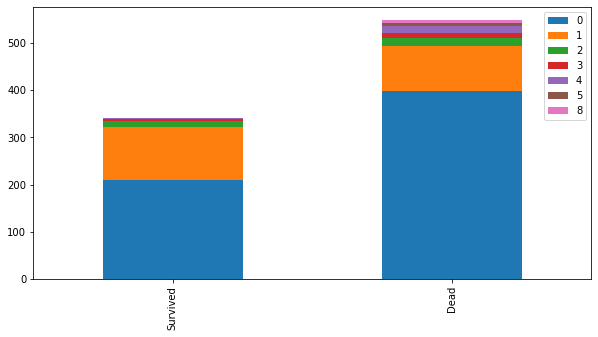

In [1060]:
bar_chart('SibSp')

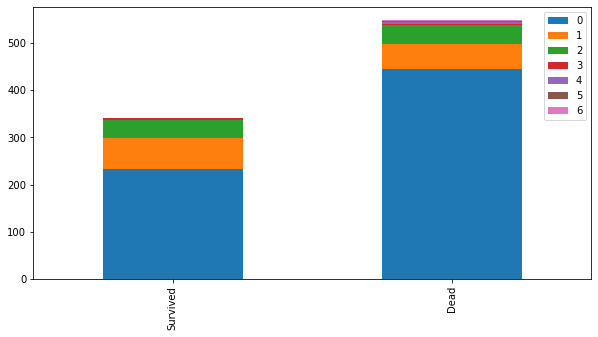

In [1061]:
bar_chart('Parch')

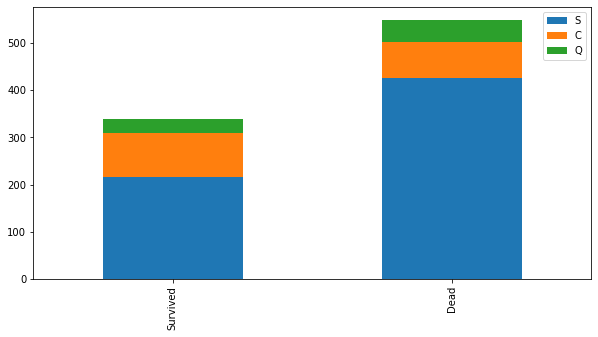

In [1062]:
bar_chart('Embarked')

In [1063]:
train['name_title']= train.Name.apply(lambda x:x.split(',')[1].split('.')[0].strip())
print(train['name_title'].value_counts())


Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Capt              1
Don               1
the Countess      1
Sir               1
Lady              1
Mme               1
Ms                1
Jonkheer          1
Name: name_title, dtype: int64


In [1064]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
print(title_mapping)
train['name_title']=train['name_title'].map(title_mapping)
#print(train['name_title'].map(title_mapping))
print(train['name_title'].value_counts())
print(train.head(19))

{'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Dr': 3, 'Rev': 3, 'Col': 3, 'Major': 3, 'Mlle': 3, 'Countess': 3, 'Ms': 3, 'Lady': 3, 'Jonkheer': 3, 'Don': 3, 'Dona': 3, 'Mme': 3, 'Capt': 3, 'Sir': 3}
0.0    517
1.0    182
2.0    125
3.0     66
Name: name_title, dtype: int64
    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         

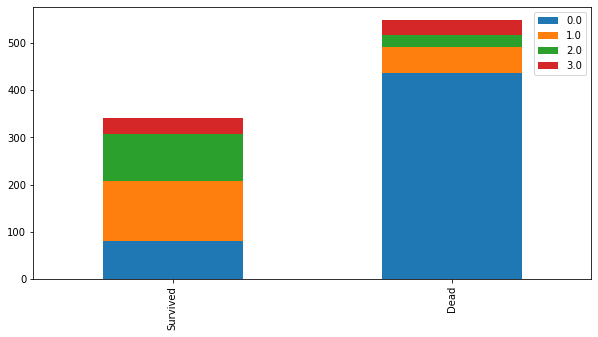

In [1065]:
bar_chart('name_title')

In [1066]:
# delete useless feature from dataset
train.drop('Name', axis=1, inplace=True)

In [1067]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [1068]:
sex_mapping = {"male": 0, "female": 1}
train['Sex']=train['Sex'].map(sex_mapping)
print(train.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3    0  22.0      1      0         A/5 21171   
1            2         1       1    1  38.0      1      0          PC 17599   
2            3         1       3    1  26.0      0      0  STON/O2. 3101282   
3            4         1       1    1  35.0      1      0            113803   
4            5         0       3    0  35.0      0      0            373450   

      Fare Cabin Embarked  name_title  
0   7.2500   NaN        S         0.0  
1  71.2833   C85        C         2.0  
2   7.9250   NaN        S         1.0  
3  53.1000  C123        S         2.0  
4   8.0500   NaN        S         0.0  


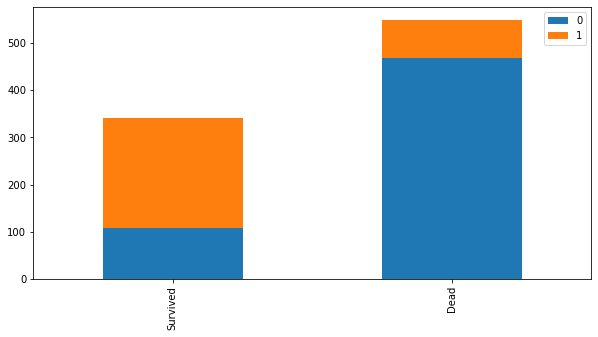

In [1069]:
bar_chart('Sex')

In [1070]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
#train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
train.Age= train.Age.fillna(train.Age.mean())
train.dropna(subset=['Embarked'], inplace=True)
train.name_title= train.name_title.fillna(0)
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Cabin        202 non-null    object 
 10  Embarked     889 non-null    object 
 11  name_title   889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 90.3+ KB
None


In [1071]:
#Converting Numerical Age to Categorical Variable feature vector map:child: 0 young: 1 adult: 2 mid-age: 3 senior: 4


In [1072]:
print(len(train))
      
for ind,row in train.iterrows():
    x=train.loc[ind,"Age"]
    if(x<=16): train.loc[ind,"Age"]=0
    elif((x>16) & (x<=26)): train.loc[ind,"Age"]=1
    elif((x>26) & (x<=36)): train.loc[ind,"Age"]=2
    elif((x>36) & (x<=60)): train.loc[ind,"Age"]=3
    else: train.loc[ind,"Age"]=4

print(train.head(20))

889
    PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0             1         0       3    0  1.0      1      0         A/5 21171   
1             2         1       1    1  3.0      1      0          PC 17599   
2             3         1       3    1  1.0      0      0  STON/O2. 3101282   
3             4         1       1    1  2.0      1      0            113803   
4             5         0       3    0  2.0      0      0            373450   
5             6         0       3    0  2.0      0      0            330877   
6             7         0       1    0  3.0      0      0             17463   
7             8         0       3    0  0.0      3      1            349909   
8             9         1       3    1  2.0      0      2            347742   
9            10         1       2    1  0.0      1      0            237736   
10           11         1       3    1  0.0      1      1           PP 9549   
11           12         1       1    1  3.0     

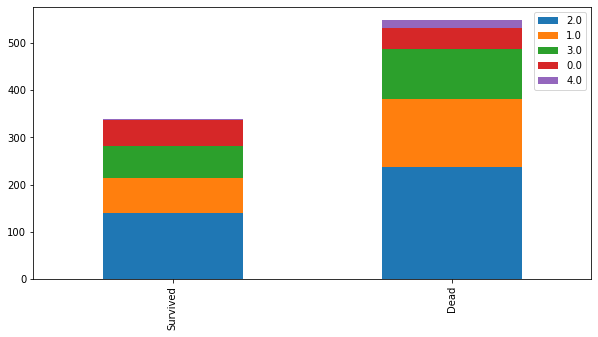

In [1073]:
bar_chart('Age')

In [1074]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Cabin        202 non-null    object 
 10  Embarked     889 non-null    object 
 11  name_title   889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 122.6+ KB


In [1075]:
for ind,row in train.iterrows():
    x=train.loc[ind,"Fare"]
    if(x<=17): train.loc[ind,"Fare"]=0
    elif((x>17) & (x<=30)): train.loc[ind,"Fare"]=1
    elif((x>30) & (x<=100)): train.loc[ind,"Fare"]=2
    else: train.loc[ind,"Fare"]=3

print(train.head(20))

    PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0             1         0       3    0  1.0      1      0         A/5 21171   
1             2         1       1    1  3.0      1      0          PC 17599   
2             3         1       3    1  1.0      0      0  STON/O2. 3101282   
3             4         1       1    1  2.0      1      0            113803   
4             5         0       3    0  2.0      0      0            373450   
5             6         0       3    0  2.0      0      0            330877   
6             7         0       1    0  3.0      0      0             17463   
7             8         0       3    0  0.0      3      1            349909   
8             9         1       3    1  2.0      0      2            347742   
9            10         1       2    1  0.0      1      0            237736   
10           11         1       3    1  0.0      1      1           PP 9549   
11           12         1       1    1  3.0      0  

In [1076]:
train=train.drop('PassengerId', axis=1)

In [1077]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
D              3
F2             3
              ..
D46            1
E36            1
B42            1
B80            1
E49            1
Name: Cabin, Length: 146, dtype: int64

In [1078]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8,"N":3.0}
#train['Cabin']=train['Cabin'].map(cabin_mapping)
#sex_mapping = {"male": 0, "female": 1}
#train['Cabin']=train['Cabin'].map(cabin_mapping)
#print(train.head())

#train['Cabin']=train['Cabin'].fillna(0)
#print(train.head(20))

for ind,rows in train.iterrows():
    x=train.loc[ind,"Cabin"]
    x=str(x)
    #print(x[0])
    if(x[0]=='C'): x=0.8
    elif(x[0]=='B'): x=0.4
    elif(x[0]=='A'): x=0.0
    elif(x[0]=='D'): x=1.2
    elif(x[0]=='E'): x=1.6
    elif(x[0]=='F'): x=2.0
    elif(x[0]=='G'): x=2.4
    elif(x[0]=='T'): x=2.8
    #print(x)
print(train.head(20))





    Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  Fare Cabin  \
0          0       3    0  1.0      1      0         A/5 21171   0.0   NaN   
1          1       1    1  3.0      1      0          PC 17599   2.0   C85   
2          1       3    1  1.0      0      0  STON/O2. 3101282   0.0   NaN   
3          1       1    1  2.0      1      0            113803   2.0  C123   
4          0       3    0  2.0      0      0            373450   0.0   NaN   
5          0       3    0  2.0      0      0            330877   0.0   NaN   
6          0       1    0  3.0      0      0             17463   2.0   E46   
7          0       3    0  0.0      3      1            349909   1.0   NaN   
8          1       3    1  2.0      0      2            347742   0.0   NaN   
9          1       2    1  0.0      1      0            237736   2.0   NaN   
10         1       3    1  0.0      1      1           PP 9549   0.0    G6   
11         1       1    1  3.0      0      0            113783  

In [1079]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8,"NaN":3.0}
#for dataset in train:
    #print(dataset.loc[0,'FamilySize'])
    #dataset = dataset.loc[:,'Cabin'].map(cabin_mapping)
#train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

train['cabin_adv'] = train.Cabin.apply(lambda x: str(x)[0])
train['cabin_adv'] = train['cabin_adv'].map(cabin_mapping)
train['cabin_adv']=train['cabin_adv'].fillna(0)
print(train.head(20))
#train['numeric_ticket'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
#train['ticket_letters'] = train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

    Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  Fare Cabin  \
0          0       3    0  1.0      1      0         A/5 21171   0.0   NaN   
1          1       1    1  3.0      1      0          PC 17599   2.0   C85   
2          1       3    1  1.0      0      0  STON/O2. 3101282   0.0   NaN   
3          1       1    1  2.0      1      0            113803   2.0  C123   
4          0       3    0  2.0      0      0            373450   0.0   NaN   
5          0       3    0  2.0      0      0            330877   0.0   NaN   
6          0       1    0  3.0      0      0             17463   2.0   E46   
7          0       3    0  0.0      3      1            349909   1.0   NaN   
8          1       3    1  2.0      0      2            347742   0.0   NaN   
9          1       2    1  0.0      1      0            237736   2.0   NaN   
10         1       3    1  0.0      1      1           PP 9549   0.0    G6   
11         1       1    1  3.0      0      0            113783  

In [1080]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
print(train.FamilySize.max())
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
train["FamilySize"]=train["FamilySize"].map(family_mapping)
print(train['FamilySize'])



#for dataset in train:
    #print(dataset.loc['FamilySize'])
    #dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

11
0      0.4
1      0.4
2      0.0
3      0.4
4      0.0
      ... 
886    0.0
887    0.0
888    1.2
889    0.0
890    0.0
Name: FamilySize, Length: 889, dtype: float64


In [1081]:
train = train.drop(['Ticket', 'SibSp', 'Parch'], axis=1)

embarked_mapping = {"S": 0, "C": 1, "Q": 2}
train["Embarked"]=train["Embarked"].map(embarked_mapping)
train.head(33)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,name_title,cabin_adv,FamilySize
0,0,3,0,1.0,0.0,NaN,0,0.0,0.0,0.4
1,1,1,1,3.0,2.0,C85,1,2.0,0.8,0.4
2,1,3,1,1.0,0.0,NaN,0,1.0,0.0,0.0
3,1,1,1,2.0,2.0,C123,0,2.0,0.8,0.4
4,0,3,0,2.0,0.0,NaN,0,0.0,0.0,0.0
5,0,3,0,2.0,0.0,NaN,2,0.0,0.0,0.0
6,0,1,0,3.0,2.0,E46,0,0.0,1.6,0.0
7,0,3,0,0.0,1.0,NaN,0,3.0,0.0,1.6
8,1,3,1,2.0,0.0,NaN,0,2.0,0.0,0.8
9,1,2,1,0.0,2.0,NaN,1,2.0,0.0,0.4


In [1082]:
target = train['Survived']
train=train.drop('Survived',axis=1)
train=train.drop('Cabin',axis=1)


print(train.head())

   Pclass  Sex  Age  Fare  Embarked  name_title  cabin_adv  FamilySize
0       3    0  1.0   0.0         0         0.0        0.0         0.4
1       1    1  3.0   2.0         1         2.0        0.8         0.4
2       3    1  1.0   0.0         0         1.0        0.0         0.0
3       1    1  2.0   2.0         0         2.0        0.8         0.4
4       3    0  2.0   0.0         0         0.0        0.0         0.0


In [1083]:
#all_dummies = pd.get_dummies(train[['Pclass','Sex','Age','Fare','Embarked','cabin_adv','numeric_ticket','ticket_letters','name_title','FamilySize']])
#print(all_dummies.head())

In [1084]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)


In [1085]:
import statistics as s
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(s.mean(score))

[0.76966292 0.79213483 0.82022472 0.78089888 0.83615819]
0.7998159080810004


In [1086]:
clf = RandomForestClassifier(n_estimators=5)
scoring = 'accuracy'
score = cross_val_score(clf, train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(s.mean(score))

[0.76966292 0.78089888 0.87640449 0.79213483 0.86440678]
0.8167015806513045


In [1088]:
from sklearn.tree import export_text
X=train
y=target
decision_tree= DecisionTreeClassifier(random_state=0,max_depth=5)
model=decision_tree.fit(X,y)
text_repr= export_text(model)
print(text_repr)

|--- feature_5 <= 0.50
|   |--- feature_0 <= 1.50
|   |   |--- feature_2 <= 3.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_2 >  3.50
|   |   |   |--- feature_3 <= 1.50
|   |   |   |   |--- feature_6 <= 0.40
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  0.40
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  1.50
|   |   |   |   |--- class: 0
|   |--- feature_0 >  1.50
|   |   |--- feature_3 <= 1.50
|   |   |   |--- feature_6 <= 0.60
|   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  0.60
|   |   |   |   |--- feature_6 <= 1.80
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  1.80
|   |   | 